<a href="https://colab.research.google.com/github/pistol-man/DataHack_MindQuest_PS5/blob/main/Bank_leave_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost


In [ ]:
xgboost.__version__

'2.0.3'

In [ ]:
df = pd.read_csv("/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")
df.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,15647311,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,15619304,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,15701354,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,15737888,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Describe #####################")
    print(dataframe.describe().T)

check_df(df)

##################### Shape #####################
(10000, 12)
##################### Types #####################
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object
##################### Head #####################
   customer_id  credit_score country  gender  age  tenure    balance  products_number  credit_card  active_member  estimated_salary  churn
0     15634602           619  France  Female   42       2      0.000                1            1              1        101348.880      1
1     15647311           608   Spain  Female   41       1  83807.860                1            0              1        112542.580      0
2     15619304           502  France  Female   42       8 159660.800    

In [ ]:

df.drop(['customer_id'], axis =1, inplace = True)

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
import matplotlib.pyplot as plt


(array([[1302.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          735.],
        [3547.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         4416.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

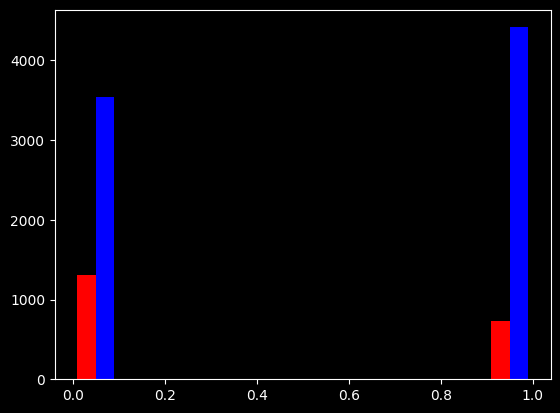

In [ ]:


# Separate the data based on the churn status
active_members_churned = df[df['churn'] == 1]['active_member']
active_members_retained = df[df['churn'] == 0]['active_member']

# Plotting
plt.hist([active_members_churned, active_members_retained], color=['red', 'blue'], label=['Churned', 'Retained'])

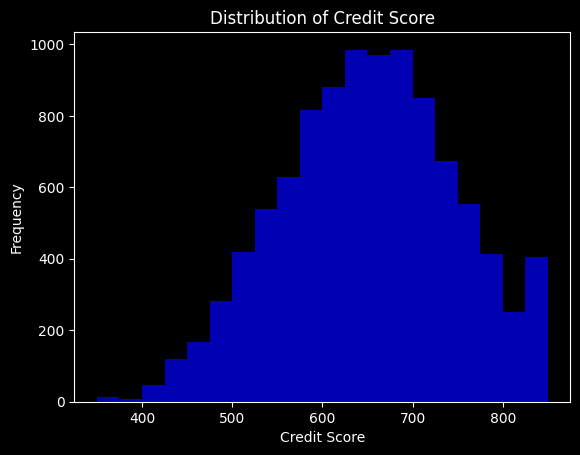

In [ ]:

# Plot the histogram
plt.hist(df['credit_score'], bins=20, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Score')

# Show the plot
plt.show()

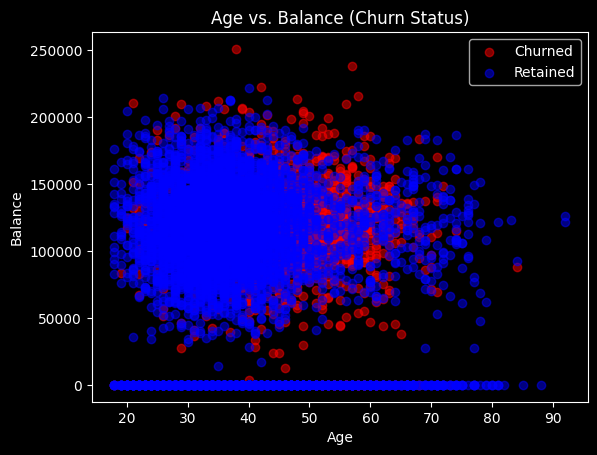

In [ ]:
churned_data = df[df['churn'] == 1]
retained_data = df[df['churn'] == 0]

# Plotting
plt.scatter(churned_data['age'], churned_data['balance'], color='red', label='Churned', alpha=0.5)
plt.scatter(retained_data['age'], retained_data['balance'], color='blue', label='Retained', alpha=0.5)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Age vs. Balance (Churn Status)')
plt.legend()

# Show plot
plt.show()

In [ ]:
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:


df['country'] = df['country'].map({'France' : 0,
                                  'Spain' : 1,
                                  'Germany' : 2})

In [ ]:
df['gender'] = df['gender'].map({'Male' : 0,
                                 'Female' : 1})

In [ ]:
df['balance'] = df['balance'].astype(int)

In [ ]:
df['estimated_salary'] = df['estimated_salary'].astype(int)

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0,1,1,1,101348,1
1,608,1,1,41,1,83807,1,0,1,112542,0
2,502,0,1,42,8,159660,3,1,0,113931,1
3,699,0,1,39,1,0,2,0,0,93826,0
4,850,1,1,43,2,125510,1,1,1,79084,0


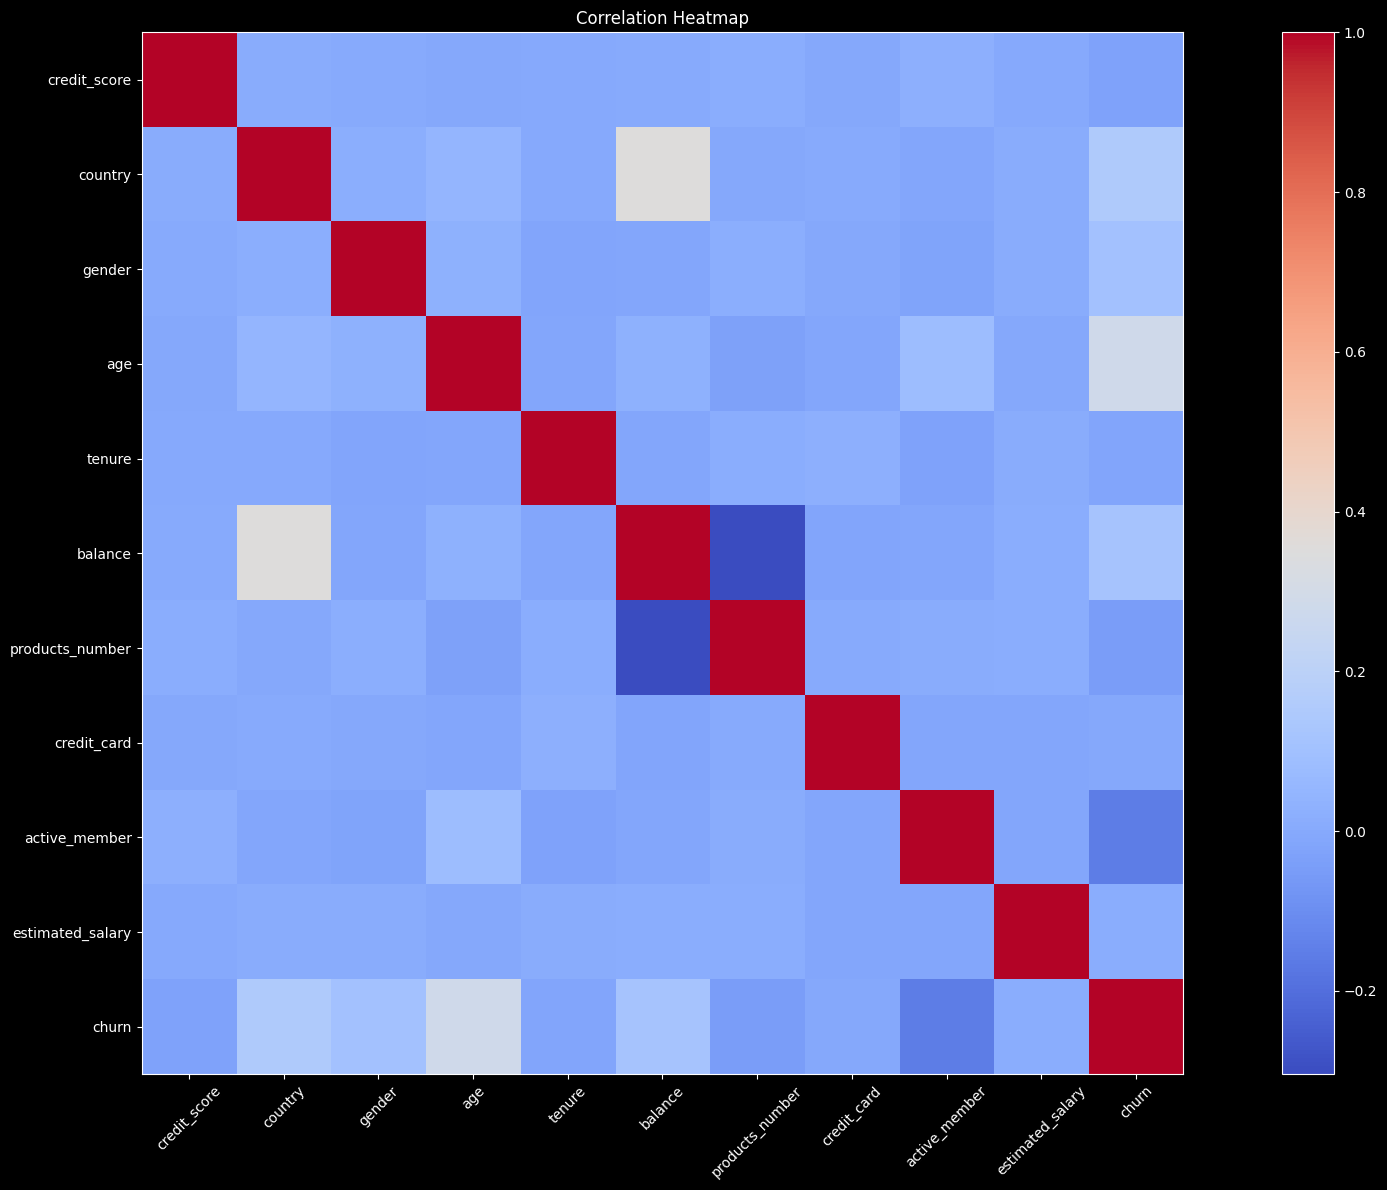

In [ ]:

correlation_matrix = df.corr()

# Plotting
plt.figure(figsize=(20, 12))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(heatmap)
plt.title('Correlation Heatmap')
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)
plt.tight_layout()
plt.show()

<Axes: xlabel='balance', ylabel='country'>

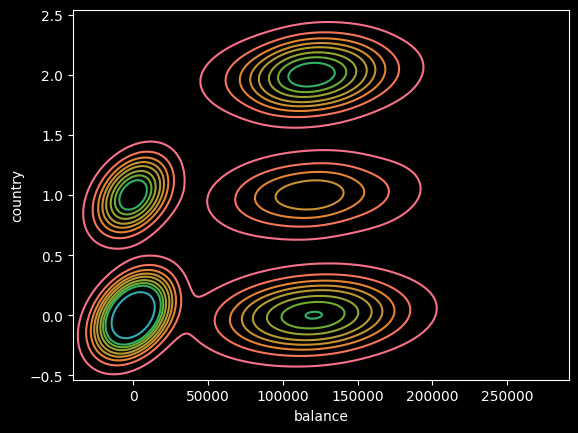

In [ ]:
sns.kdeplot(data=df, x = 'balance', y = 'country', cmap='husl')

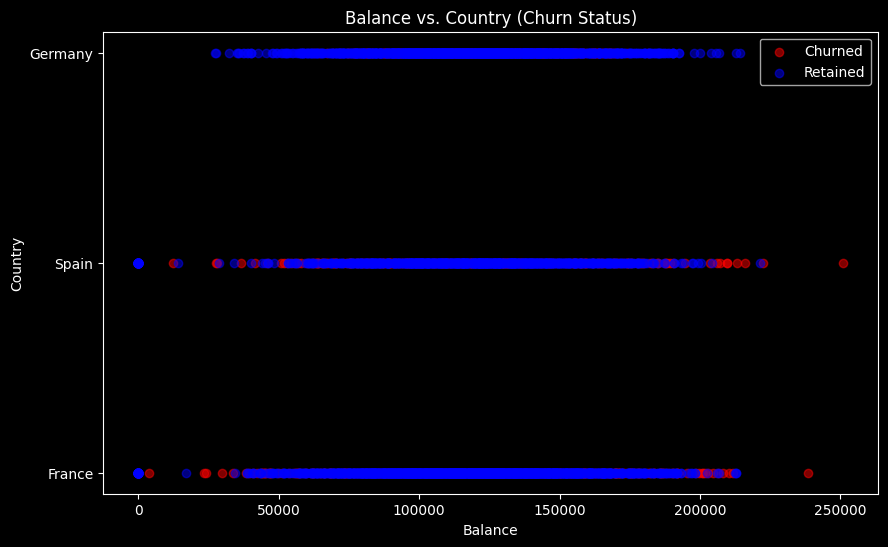

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(churned_data['balance'], churned_data['country'], color='red', label='Churned', alpha=0.5)
plt.scatter(retained_data['balance'], retained_data['country'], color='blue', label='Retained', alpha=0.5)

# Adding labels and title
plt.xlabel('Balance')
plt.ylabel('Country')
plt.title('Balance vs. Country (Churn Status)')
plt.legend()

# Show plot
plt.show()

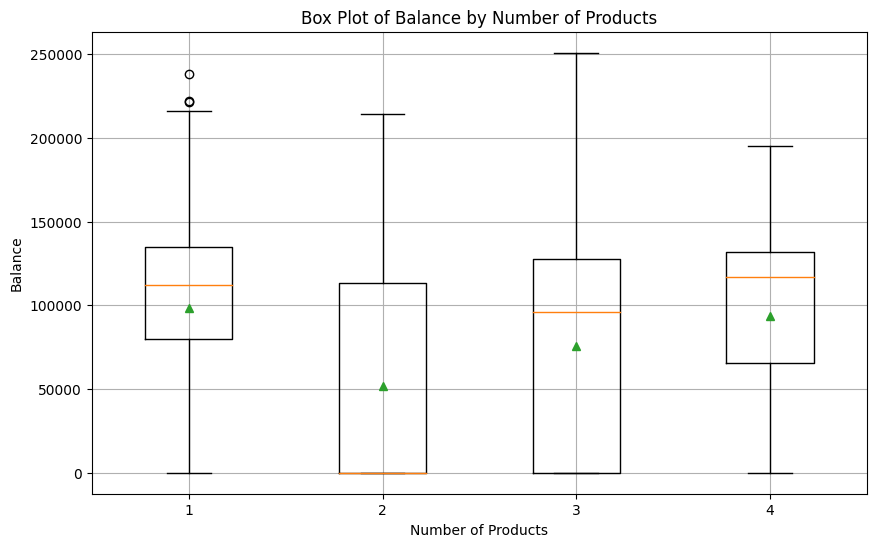

In [ ]:
grouped_data = df.groupby('products_number')['balance'].apply(list)

plt.style.use('default')
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data.values, labels=grouped_data.index, showmeans=True)
plt.xlabel('Number of Products')
plt.ylabel('Balance')
plt.title('Box Plot of Balance by Number of Products')
plt.grid(True)
plt.show()

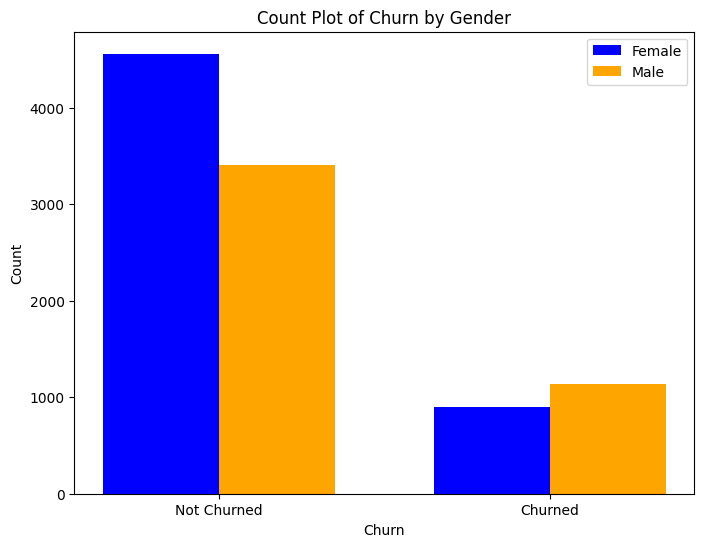

In [ ]:
grouped_data = df.groupby(['churn', 'gender']).size().unstack()

# Plotting
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(grouped_data))
plt.bar(index, grouped_data[0], bar_width, label='Female', color='blue')
plt.bar([i + bar_width for i in index], grouped_data[1], bar_width, label='Male', color='orange')

# Adding labels and title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot of Churn by Gender')
plt.xticks([i + bar_width / 2 for i in index], ['Not Churned', 'Churned'])
plt.legend()

# Show plot
plt.show()

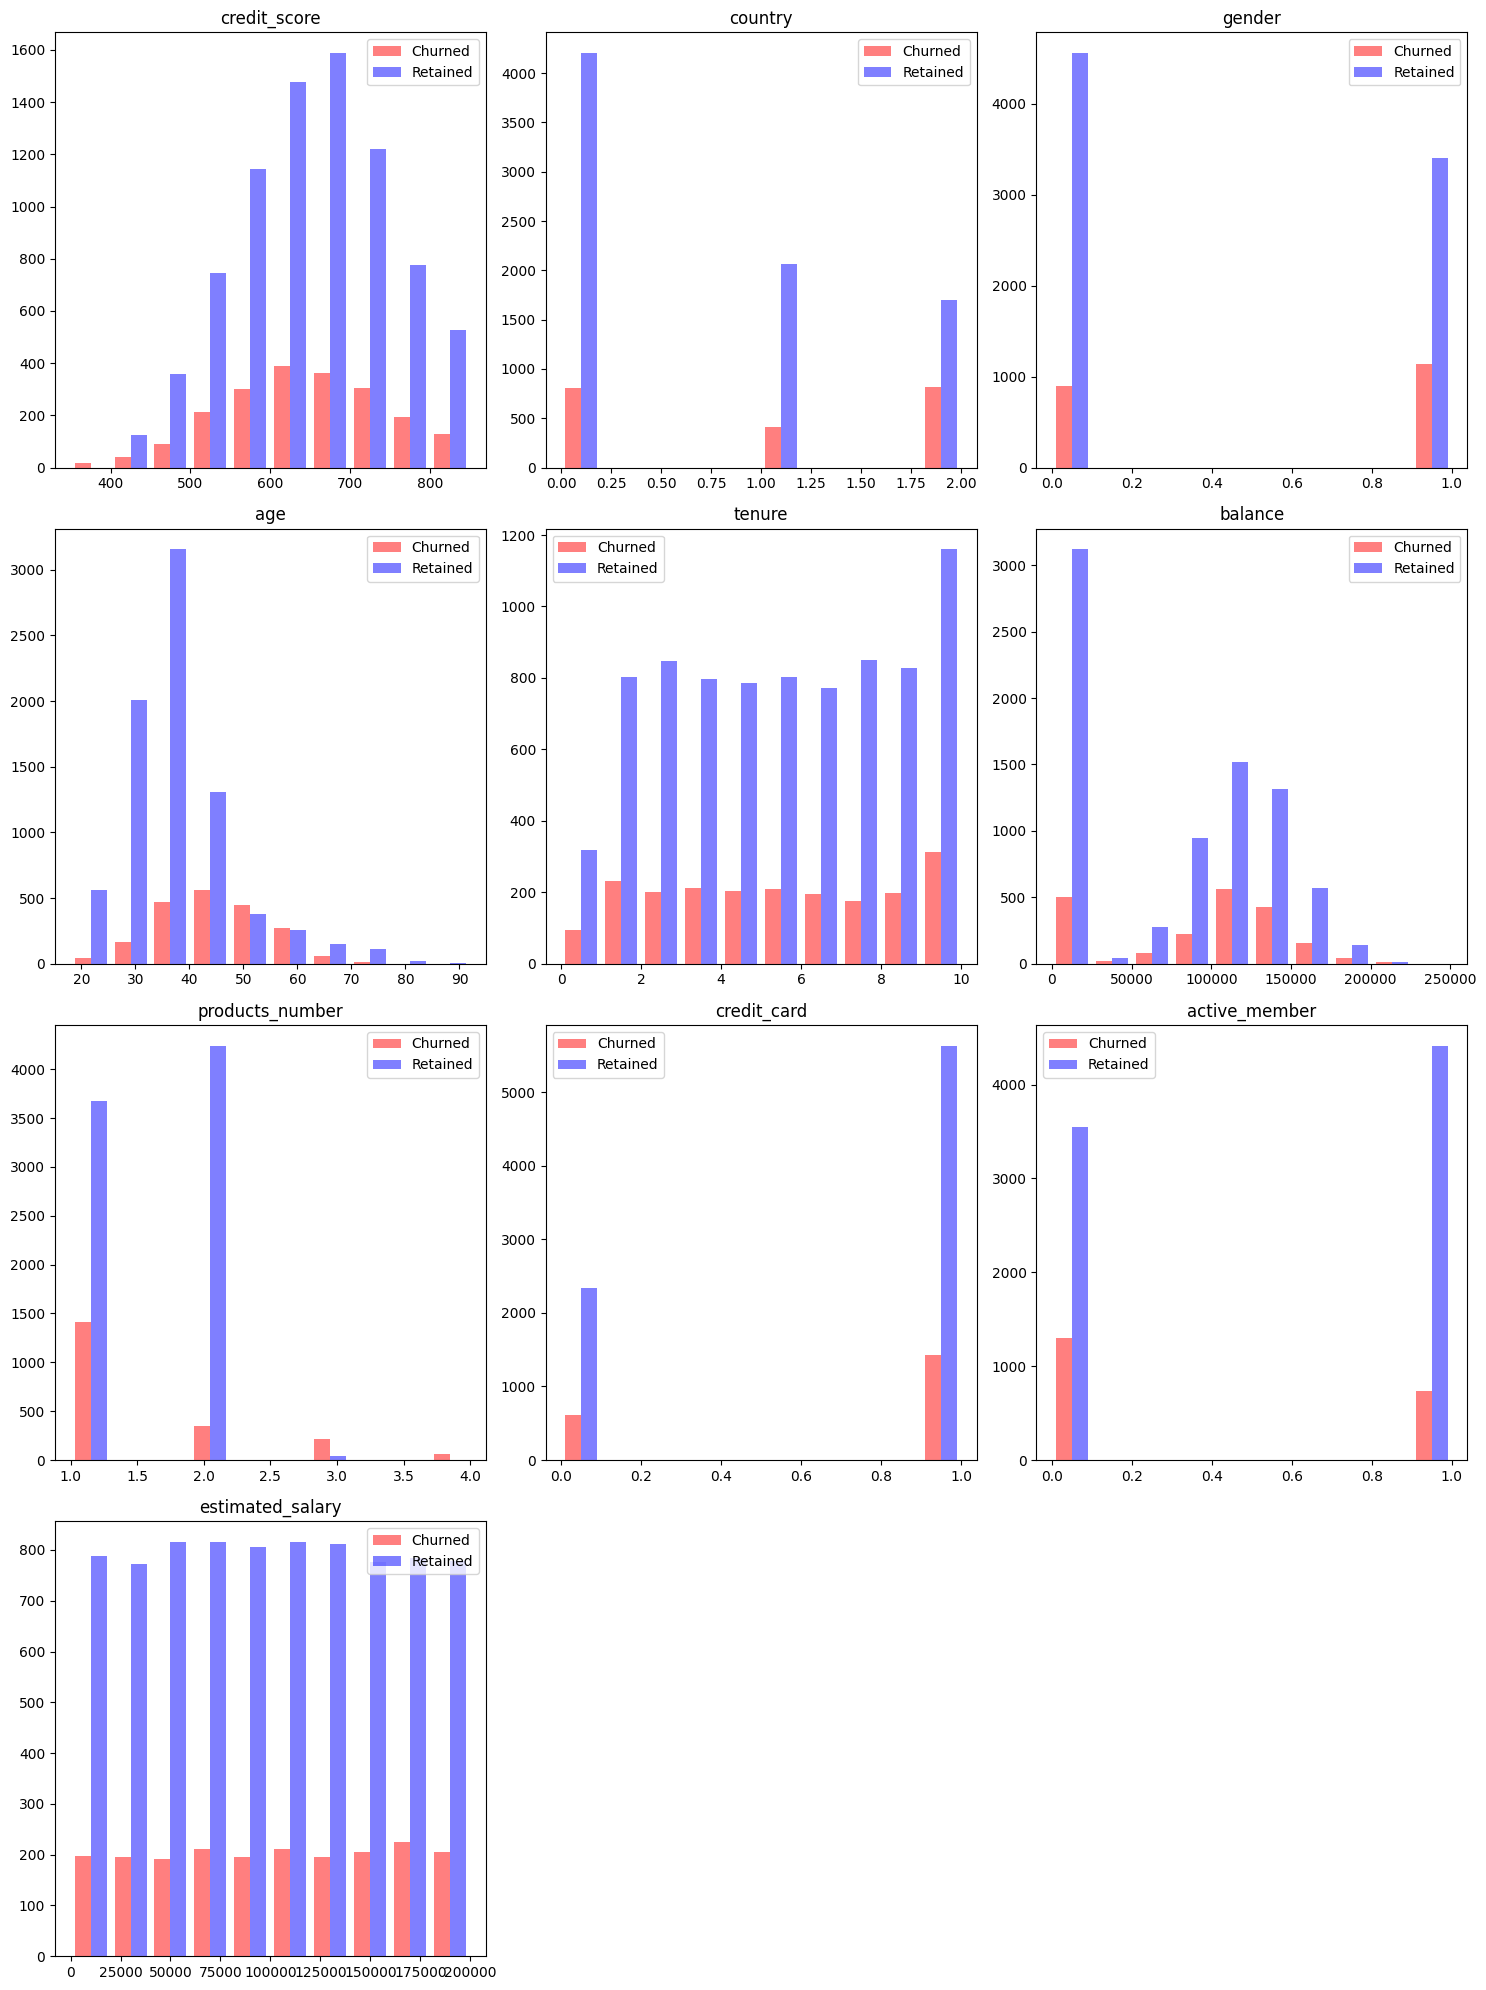

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

axs = axs.flatten()

for i, column in enumerate(df.columns[:-1]):
    churned_data = df[df['churn'] == 1][column]
    retained_data = df[df['churn'] == 0][column]
    axs[i].hist([churned_data, retained_data], color=['red', 'blue'], alpha=0.5, label=['Churned', 'Retained'])
    axs[i].set_title(column)
    axs[i].legend()

for j in range(len(df.columns) - 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0,1,1,1,101348,1
1,608,1,1,41,1,83807,1,0,1,112542,0
2,502,0,1,42,8,159660,3,1,0,113931,1
3,699,0,1,39,1,0,2,0,0,93826,0
4,850,1,1,43,2,125510,1,1,1,79084,0


# ****Modeling****

In [ ]:
X = df.drop(columns = 'churn')
y = df['churn']

In [ ]:
X.shape

(10000, 10)

In [ ]:
y.shape

(10000,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.2)

In [ ]:
print(X_train.shape,
     X_test.shape,
     y_train.shape,
     y_test.shape)

(8000, 10) (2000, 10) (8000,) (2000,)


# **Feature Engineering**

# **Random Forest**

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100,
                                   criterion = 'gini',
                                   max_depth=10,
                                   min_samples_split=2,
                                   min_samples_leaf=2,
                                   max_features='log2')
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2)

In [ ]:
y_pred = classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.867


# **XGBClassifier**

In [ ]:
xgb = XGBClassifier(n_estimators=480, learning_rate=0.2, max_depth=8)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=480, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_y_pred = xgb.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.867


# **GridSearchCV to find best parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10)

In [ ]:
model = RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=0)



In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
print("Parameters:", grid_search.best_params_)
print("Score:", grid_search.best_score_)

Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Score: 0.867


In [ ]:
classifier = RandomForestClassifier(**grid_search.best_params_)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_split=10,
                       n_estimators=300)

In [ ]:
y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_accuracy)

Accuracy: 0.93325


In [ ]:
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.8665


## Grid Search on xgboost


In [ ]:
train_indices = np.random.choice(len(X_train), size=1000, replace=False)
X = X_train.iloc[train_indices]
y = y_train.iloc[train_indices]



In [ ]:
(len(X),len(y))

(1000, 1000)

In [ ]:
model2 = XGBClassifier()

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.2, 0.4],
    'subsample': [0.6, 0.8, 1.0]
}

In [ ]:
grid_search_xgb = GridSearchCV(estimator=model2,
                           param_grid=param_grid_xgb,
                           cv=5,
                           n_jobs=-1,
                           verbose=0)


In [ ]:
grid_search_xgb.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.2, 0.4],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]})

In [ ]:
print("Parameters:", grid_search_xgb.best_params_)
print("Score:", grid_search_xgb.best_score_)

Parameters: {'gamma': 0.4, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}
Score: 0.865


In [ ]:
classifier_xgb = XGBClassifier(**grid_search_xgb.best_params_)
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred = classifier_xgb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_accuracy)

Accuracy: 0.877625


In [ ]:
y_test_pred = classifier_xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.866


In [ ]:
import pickle
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(classifier, f)

In [ ]:
import pickle
with open('xgb.pkl', 'wb') as f:
    pickle.dump(classifier_xgb, f)

In [ ]:
X_train.head()

NameError: name 'X_train' is not defined

In [ ]:
import pickle
with open("xgb.pkl",'rb') as f:
    xgb = pickle.load(f)

In [ ]:
xgb.predict([[686, 0, 0, 32, 6, 0, 2, 1, 1, 179093]])

array([0])